In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
plt.style.use('seaborn')

In [3]:
xlsx = pd.ExcelFile('data.xlsx')

In [4]:
df = pd.read_excel(xlsx,'Data_Quarter2')
df.isnull().any()

No. of billing               False
SKU                          False
Quantity Sale                False
Revenue                      False
NAME OF ASM  (FIRST NAME)    False
NAME OF ASM  (LAST NAME)     False
DATE                         False
Area                         False
Region                       False
dtype: bool

In [5]:
df.shape

(740, 9)

In [6]:
df2 = pd.read_excel(xlsx,'Data_Ques2')
df2.isnull().any()

No. Billing             False
Sum of Revenue          False
Sum of Quantity Sale    False
Sale Point              False
Area                    False
dtype: bool

In [7]:
df2.shape

(388, 5)

In [8]:
pro_df = pd.read_excel(xlsx,'Ques3_Pro')
pro_df.isnull().any()

SKU                            False
No. of Inventory\nProvinces    False
Quantity sale of Provinces     False
Stock Cover of Provinces       False
Short in invetory               True
dtype: bool

In [9]:
pro_df.shape

(220, 5)

In [10]:
hcm_df = pd.read_excel(xlsx,'Ques3_HCM')
hcm_df.isnull().any()

SKU                            False
No. of Inventory\nHCM Areas    False
Quantity sale of HCM Areas     False
Stock Cover of HCM Areas       False
Short in invetory               True
dtype: bool

In [11]:
hcm_df.shape

(135, 5)

# Revenue

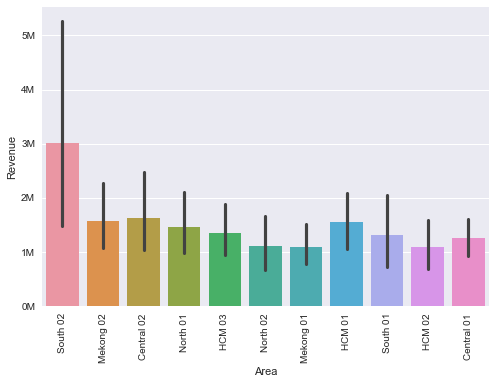

In [12]:
ax = sns.barplot(x='Area',y='Revenue',estimator=np.mean, data = df.sort_values('Revenue', ascending=False));
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000000) + 'M'))

In [13]:
df['MONTH'] = df['DATE'].apply(lambda x: x.strftime("%m")) 

In [14]:
df['MONTH']

0      06
1      06
2      06
3      05
4      04
       ..
735    05
736    06
737    06
738    06
739    06
Name: MONTH, Length: 740, dtype: object

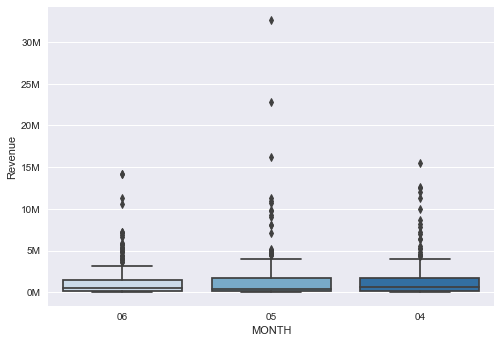

In [15]:
ax = sns.boxplot(data=df,x='MONTH',y='Revenue',palette='Blues');
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000000) + 'M'))

# Stock Cover

### HCM Areas

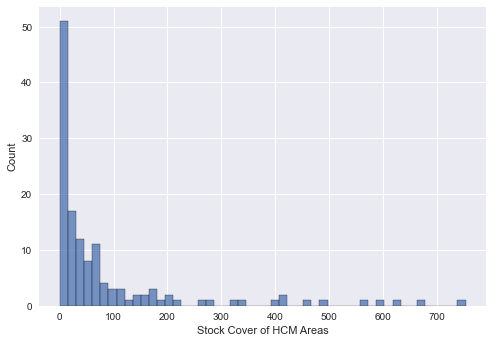

In [16]:
sns.histplot(data = hcm_df, x = 'Stock Cover of HCM Areas', bins=50);

In [17]:
c_hcm = hcm_df[['SKU','Stock Cover of HCM Areas']]
hcm = c_hcm.sort_values(by=['Stock Cover of HCM Areas'])

In [18]:
hcm

,SKU,Stock Cover of HCM Areas
27,Dialga,0.127273
26,Kangaskhan,0.164835
46,Shuppet,0.279661
31,Chesapeake,0.314286
6,Billings,0.508671
...,...,...
8,Reno,571.666667
118,Wolverhampton,592.500000
108,Lithium,631.000000
93,Spinda,666.000000


HCM areas have 135 SKUs

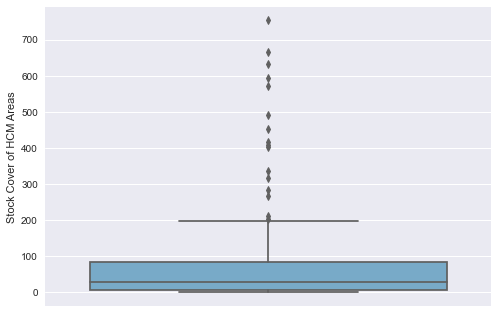

In [19]:
sns.boxplot(data=hcm_df,y='Stock Cover of HCM Areas',palette='Blues');

In [20]:
hcm_df.describe()

,No. of Inventory\nHCM Areas,Quantity sale of HCM Areas,Stock Cover of HCM Areas
count,135.000000,135.000000,135.000000
mean,299.170370,57.555556,87.319838
std,268.140516,81.339776,147.662930
min,7.000000,1.000000,0.127273
25%,87.500000,8.000000,6.281959
50%,215.000000,28.000000,27.369231
75%,484.000000,77.000000,83.875000
max,1715.000000,529.000000,753.000000


### Provinces

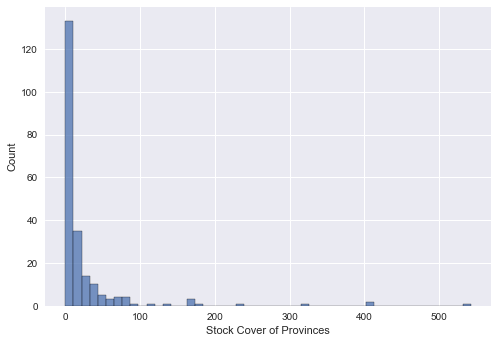

In [21]:
sns.histplot(data = pro_df, x = 'Stock Cover of Provinces', bins=50);

In [22]:
c_pro = pro_df [['SKU','Stock Cover of Provinces']]
pro = c_pro.sort_values(by=['Stock Cover of Provinces'])

In [23]:
pro

,SKU,Stock Cover of Provinces
47,Magmortar,0.000000
29,Pittsburgh,0.000000
34,Murcia,0.011416
28,Iaşi,0.017241
48,Shuppet,0.023810
...,...,...
121,Philadelphia,229.500000
219,Horsea,321.000000
116,Raccoon,406.500000
194,Newcastle upon Tyne,408.000000


Provinces have 220 SKUs

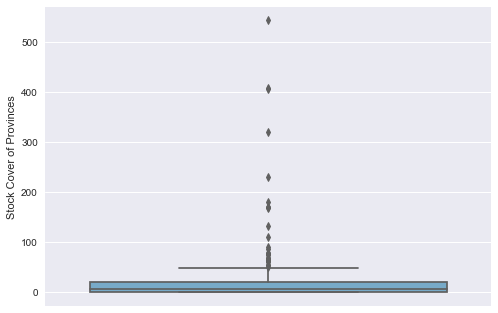

In [24]:
sns.boxplot(data=pro_df,y='Stock Cover of Provinces',palette='Blues');

In [25]:
pro_df.describe()

,No. of Inventory\nProvinces,Quantity sale of Provinces,Stock Cover of Provinces
count,220.000000,220.000000,220.000000
mean,97.668182,99.463636,25.637711
std,100.813059,185.837543,64.091354
min,0.000000,1.000000,0.000000
25%,21.000000,10.000000,0.991796
50%,67.500000,34.000000,5.414062
75%,146.250000,100.500000,20.535000
max,526.000000,1486.000000,543.000000


### Provinces and HCM areas

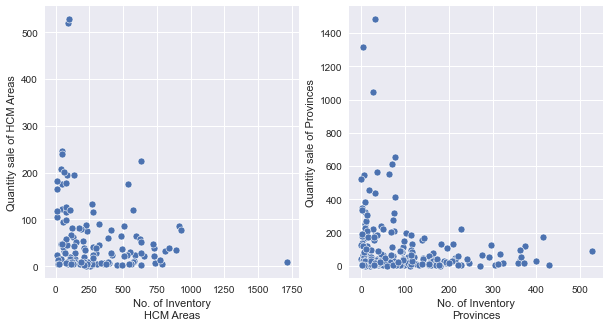

In [27]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data = hcm_df, x = 'No. of Inventory\nHCM Areas', y = 'Quantity sale of HCM Areas', ax = ax[0]);
sns.scatterplot(data = pro_df, x = 'No. of Inventory\nProvinces', y = 'Quantity sale of Provinces', ax = ax[1]);

We can see that the correlation between inventory and quantity sales is inverse. Specifically, with high quantity sales, the level of inventory stock is low. With the chart above, we can see that there are still some items that have a relatively small amount of inventory despite having a lot of quality sales.
The inventory level in HCM areas is quite high compared to Provinces but quantity sales in Provinces is higher than in HCM areas. In general, HCM areas have only 4 branches while Provinces have 11 branches, so it is understandable why the quantity sales in Provinces is higher than in HCM areas. However, the inventory levels of the two regions are still not properly organized relative to the quantity sales.

# Sale point

In [ ]:
sns.histplot(data = df2, x ='Sale Point', bins=50);

In [ ]:
df2['No. Billing'].nunique()

There are 388 bills

In [ ]:
counts = df2['Sale Point'].value_counts().to_dict()

In [ ]:
counts

The popular sale point is 1.5 for the amount of 270 bills.
The remaining levels of sale points are quite modest such as 0.5 with 26 bills; 1 with 84 bills; 2 with 6 bills; 0 with 2 bills